In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [2]:
movie_id=[]
movie_name = []
genre=[]
plots=[]

# Open the file in read mode
file= open('train_data.txt', 'r',encoding='utf-8') 
    # Read each line in the file
for line in file:
    
    a=line.split(":::")[0]
    #a.replace("'","")
    b=line.split(":::")[1]
    #b.replace("'","")
    c=line.split(":::")[2]
    d=line.split(":::")[3]
    movie_id.append(a)
    movie_name.append(b)
    genre.append(c)
    plots.append(d)
print(movie_id[0])
print(movie_name[0])
print(genre[0])
print(plots[0])


        
        

1 
 Oscar et la dame rose (2009) 
 drama 
 Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.



In [3]:
#data frame

movies=pd.DataFrame({'id':movie_id,' name': movie_name,'genre': genre,'plot':plots})

movies.head()




,id,name,genre,plot
0,1,Oscar et la dame rose (2009),drama,"Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas a..."
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.\n
2,3,"Young, Wild and Wonderful (1980)",adult,"As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the students are there for more than just another tour. First, during the lecture films, the coeds drift into dreams of the most erotic fantasies one can imagine. After..."
3,4,The Secret Sin (1915),drama,"To help their unemployed father make ends meet, Edith and her twin sister Grace work as seamstresses . An invalid, Grace falls prey to the temptations of Chinatown opium and becomes an addict, a condition worsened by a misguided physician who prescribes morphine to ease her pain. When their fat..."
4,5,The Unrecovered (2007),drama,"The film's title refers not only to the un-recovered bodies at ground zero, but also to the state of the nation at large. Set in the hallucinatory period of time between September 11 and Halloween of 2001, The Unrecovered examines the effect of terror on the average mind, the way a state of hei..."


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      54214 non-null  object
 1    name   54214 non-null  object
 2   genre   54214 non-null  object
 3   plot    54214 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [5]:
movies.shape

(54214, 4)

In [6]:
#preprocessing

movies['genre']=movies['genre'].astype(str)
movies['genre']=movies['genre'].str.strip('0')
movies['genre'].isnull().any()

False

In [7]:
def clean(text):
    
    text = re.sub(r'[^a-zA-Z]',' ',text)
    # remove whitespaces
    text = ' '.join(text.split())
    # convert text to lowercase
    text = text.lower()
    return text

movies['clean_plot'] = movies['plot'].apply(lambda x: clean(x))
movies.head(3)

,id,name,genre,plot,clean_plot
0,1,Oscar et la dame rose (2009),drama,"Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas a...",listening in to a conversation between his doctor and parents year old oscar learns what nobody has the courage to tell him he only has a few weeks to live furious he refuses to speak to anyone except straight talking rose the lady in pink he meets on the hospital stairs as christmas approaches ...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.\n,a brother and sister with a past incestuous relationship have a current murderous relationship he murders the women who reject him and she murders the women who get too close to him
2,3,"Young, Wild and Wonderful (1980)",adult,"As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the students are there for more than just another tour. First, during the lecture films, the coeds drift into dreams of the most erotic fantasies one can imagine. After...",as the bus empties the students for their field trip to the museum of natural history little does the tour guide suspect that the students are there for more than just another tour first during the lecture films the coeds drift into dreams of the most erotic fantasies one can imagine after the f...


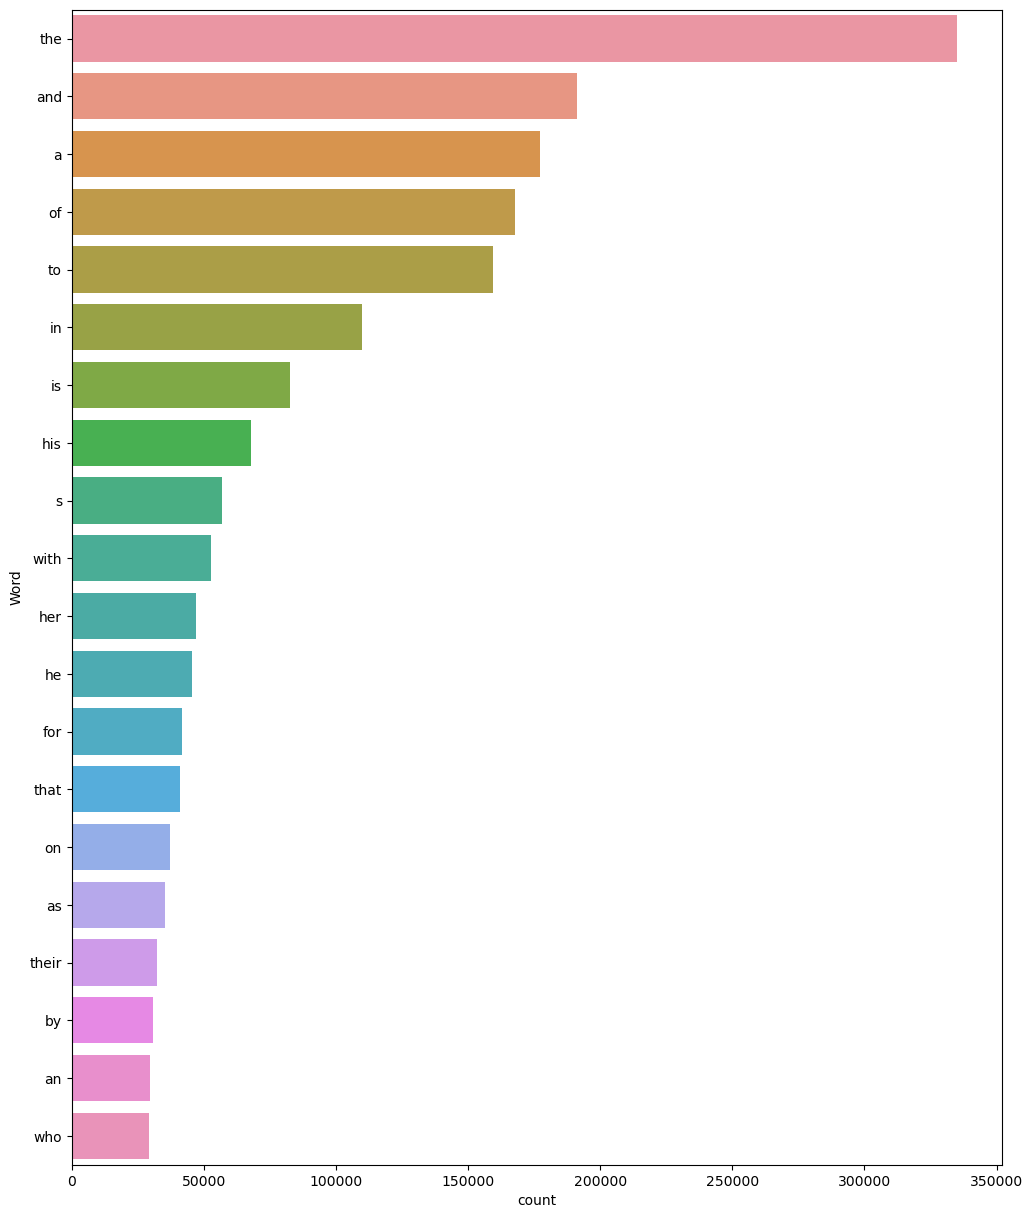

In [8]:
def freqwords(x):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
   
    fdist = nltk.FreqDist(all_words)
    freq_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
# selecting top 20 most frequent words
    d = freq_df.nlargest(columns="count", n =20)
# visualize words and frequencies
    plt.figure(figsize=(12,15))
    ax = sns.barplot(data=d, x= "count", y = "word")
    ax.set(ylabel = 'Word')
    plt.show()
# print 100 most frequent words
freqwords(movies['clean_plot'])

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [10]:
#removing stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# function to remove stopwords
def removestopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)
movies['clean_plot'] = movies['clean_plot'].apply(lambda x: removestopwords(x))

In [11]:
movies.head()


,id,name,genre,plot,clean_plot
0,1,Oscar et la dame rose (2009),drama,"Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas a...",listening conversation doctor parents year old oscar learns nobody courage tell weeks live furious refuses speak anyone except straight talking rose lady pink meets hospital stairs christmas approaches rose uses fantastical experiences professional wrestler imagination wit charm allow oscar live...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.\n,brother sister past incestuous relationship current murderous relationship murders women reject murders women get close
2,3,"Young, Wild and Wonderful (1980)",adult,"As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the students are there for more than just another tour. First, during the lecture films, the coeds drift into dreams of the most erotic fantasies one can imagine. After...",bus empties students field trip museum natural history little tour guide suspect students another tour first lecture films coeds drift dreams erotic fantasies one imagine films release emotion fantasies erotic uncommon ways one slips curator office little acquisition another finds anthropologist...
3,4,The Secret Sin (1915),drama,"To help their unemployed father make ends meet, Edith and her twin sister Grace work as seamstresses . An invalid, Grace falls prey to the temptations of Chinatown opium and becomes an addict, a condition worsened by a misguided physician who prescribes morphine to ease her pain. When their fat...",help unemployed father make ends meet edith twin sister grace work seamstresses invalid grace falls prey temptations chinatown opium becomes addict condition worsened misguided physician prescribes morphine ease pain father strikes oil family enjoys new prosperity sisters meet eligible jack herr...
4,5,The Unrecovered (2007),drama,"The film's title refers not only to the un-recovered bodies at ground zero, but also to the state of the nation at large. Set in the hallucinatory period of time between September 11 and Halloween of 2001, The Unrecovered examines the effect of terror on the average mind, the way a state of hei...",film title refers un recovered bodies ground zero also state nation large set hallucinatory period time september halloween unrecovered examines effect terror average mind way state heightened anxiety alertness cause average person make sort imaginative connections normally made artists conspira...


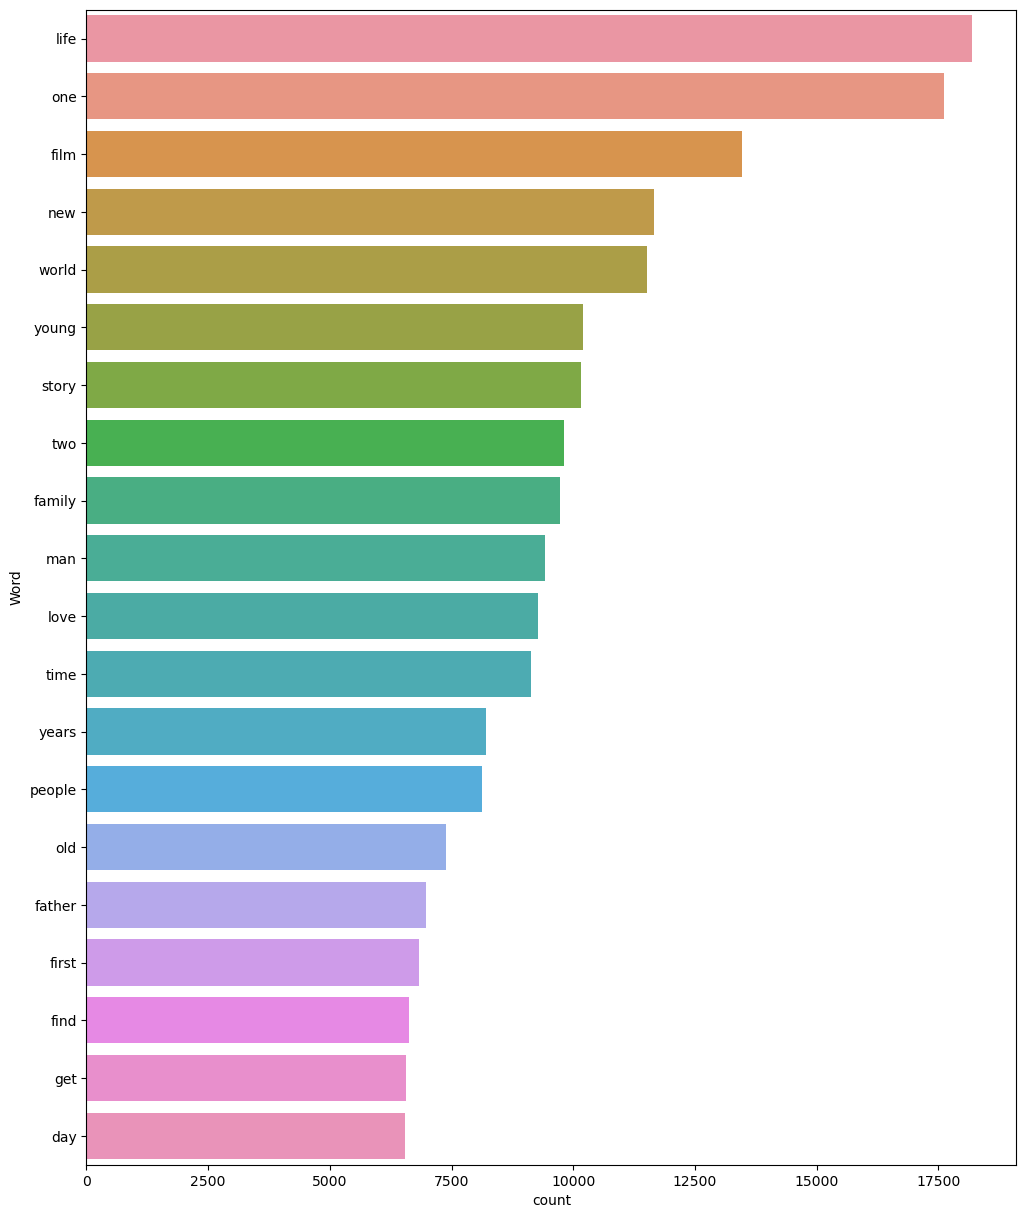

In [12]:
def freqwords(x):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = nltk.FreqDist(all_words)
    freq_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
# selecting top 20 most frequent words
    d = freq_df.nlargest(columns="count", n =20)
# visualize words and frequencies
    plt.figure(figsize=(12,15))
    ax = sns.barplot(data=d, x= "count", y = "word")
    ax.set(ylabel = 'Word')
    plt.show()
# print 100 most frequent words
freqwords(movies['clean_plot'])

In [13]:
#converting all the genre into different classes with binary values

from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies['genre'].str.split(','))
y=multilabel_binarizer.transform(movies['genre'].str.split(','))
multilabel_binarizer.classes_


array([' action ', ' adult ', ' adventure ', ' animation ', ' biography ',
       ' comedy ', ' crime ', ' documentary ', ' drama ', ' family ',
       ' fantasy ', ' game-show ', ' history ', ' horror ', ' music ',
       ' musical ', ' mystery ', ' news ', ' reality-tv ', ' romance ',
       ' sci-fi ', ' short ', ' sport ', ' talk-show ', ' thriller ',
       ' war ', ' western '], dtype=object)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(movies['clean_plot'],y,test_size=0.2,random_state=9)


In [37]:
#feature extraction
tfidf_vectorizer=TfidfVectorizer(max_df=0.8,max_features=10000)
xtrain_tfidf=tfidf_vectorizer.fit_transform(x_train)
xtest_tfidf=tfidf_vectorizer.fit_transform(x_test)
def feature_extraction(text):
    features=tfidf_vectorizer.transform([text])
    return features


In [16]:
#Model building
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
lr=LogisticRegression(solver='lbfgs', max_iter=1000, tol=1e-4)
OvR=OneVsRestClassifier(lr)


In [17]:
#training the model
OvR.fit(xtrain_tfidf,y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [18]:
#Make predictions usinf test data
y_predict=OvR.predict(xtest_tfidf)

In [19]:
#Model evaluation
from sklearn.metrics import f1_score
f1_score(y_predict,y_test,average='micro')


0.05858478913005117

In [25]:
y_pred_prob = OvR.predict_proba(xtest_tfidf)
t=0.2
y_prediction = (y_pred_prob >= t).astype(int)
f1_score(y_test, y_prediction, average="micro")


0.2533767130040422

In [38]:
def Final(q):
    q = clean(q)
    q = removestopwords(q)
    q_vec = feature_extraction(q)
    q_pred = OvR.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [48]:
#Testing
print( "Genre:",Final(x_test[49662]))


Genre: [(' documentary ',)]
